# Project: Hyperspectral benchmark dataset on soil moisture

    This dataset was measured in a five-day field campaign in May 2017 in Karlsruhe, Germany. An undisturbed soil sample is the centerpiece of the measurement setup. The soil sample consists of bare soil without any vegetation and was taken in the area near Waldbronn, Germany.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

sns.set_theme(style='dark')

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("soilmoisture_dataset.csv")

df.shape

(679, 129)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head(3)

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,606,610,614,618,622,626,630,634,638,642,646,650,654,658,662,666,670,674,678,682,686,690,694,698,702,706,710,714,718,722,726,730,734,738,742,746,750,754,758,762,766,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
0,0,2017-05-23 14:06:17,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,0.091937,0.093224,0.094385,0.095525,0.096540,0.097314,0.098643,0.099727,0.100315,0.100970,0.102445,0.103158,0.104330,0.105502,0.106747,0.107808,0.108972,0.110062,0.111475,0.112408,0.114026,0.115428,0.116656,0.117563,0.118604,0.120297,0.121540,0.122902,0.124128,0.125389,0.126915,0.128255,0.129456,0.130560,0.131703,0.133032,0.134231,0.135413,0.136705,0.137879,0.138825,0.139682,0.140110,0.140961,0.141718,0.142165,0.143240,0.144417,0.145237,0.145595,0.145843,0.146072,0.146550,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,2017-05-23 14:08:17,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,0.090900,0.092436,0.093708,0.094447,0.095737,0.096545,0.097538,0.098355,0.099056,0.100267,0.101267,0.102085,0.103209,0.104392,0.105429,0.106537,0.107480,0.108868,0.110183,0.111710,0.113016,0.114101,0.115486,0.116505,0.117551,0.119242,0.120538,0.121648,0.122903,0.124025,0.125388,0.126950,0.128283,0.129832,0.130674,0.131354,0.132735,0.134591,0.135896,0.136682,0.137322,0.138213,0.139124,0.140073,0.140868,0.141593,0.141932,0.142277,0.143425,0.144398,0.144630,0.145129,0.145314,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,2017-05-23 14:10:17,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,0.091509,0.092728,0.093977,0.094496,0.095544,0.096208,0.097208,0.098451,0.099294,0.100364,0.100893,0.102361,0.103514,0.104140,0.105620,0.106982,0.107483,0.108906,0.110083,0.111291,0.112820,0.114293,0.115602,0.116240,0.117658,0.118681,0.119979,0.121427,0.122773,0.124476,0.125851,0.127127,0.128307,0.129619,0.130696,0.131959,0.133335,0.134636,0.135737,0.136548,0.137510,0.138427,0.139275,0.139638,0.140091,0.141033,0.141589,0.142576,0.143226,0.144020,0.144574,0.145234,0.145732,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,

###  Variables

- **datetime:** date and time of the measurement
- **soil_moisture:** soil moisture in %
- **soil_temperature:** soil temperature in °C
- **454, 458, … 946, 950:** hyperspectral bands in nm

In [18]:
# df['datetime']=pd.to_datetime(df['datetime'],'%Y-%m-%d %H:%M:%S')

# df['month']=df['datetime'].dt.month

# df['year']=df['datetime'].dt.year

In [7]:
df.head()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,606,610,614,618,622,626,630,634,638,642,646,650,654,658,662,666,670,674,678,682,686,690,694,698,702,706,710,714,718,722,726,730,734,738,742,746,750,754,758,762,766,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
0,0,2017-05-23 14:06:17,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,0.091937,0.093224,0.094385,0.095525,0.096540,0.097314,0.098643,0.099727,0.100315,0.100970,0.102445,0.103158,0.104330,0.105502,0.106747,0.107808,0.108972,0.110062,0.111475,0.112408,0.114026,0.115428,0.116656,0.117563,0.118604,0.120297,0.121540,0.122902,0.124128,0.125389,0.126915,0.128255,0.129456,0.130560,0.131703,0.133032,0.134231,0.135413,0.136705,0.137879,0.138825,0.139682,0.140110,0.140961,0.141718,0.142165,0.143240,0.144417,0.145237,0.145595,0.145843,0.146072,0.146550,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,2017-05-23 14:08:17,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,0.090900,0.092436,0.093708,0.094447,0.095737,0.096545,0.097538,0.098355,0.099056,0.100267,0.101267,0.102085,0.103209,0.104392,0.105429,0.106537,0.107480,0.108868,0.110183,0.111710,0.113016,0.114101,0.115486,0.116505,0.117551,0.119242,0.120538,0.121648,0.122903,0.124025,0.125388,0.126950,0.128283,0.129832,0.130674,0.131354,0.132735,0.134591,0.135896,0.136682,0.137322,0.138213,0.139124,0.140073,0.140868,0.141593,0.141932,0.142277,0.143425,0.144398,0.144630,0.145129,0.145314,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,2017-05-23 14:10:17,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,0.091509,0.092728,0.093977,0.094496,0.095544,0.096208,0.097208,0.098451,0.099294,0.100364,0.100893,0.102361,0.103514,0.104140,0.105620,0.106982,0.107483,0.108906,0.110083,0.111291,0.112820,0.114293,0.115602,0.116240,0.117658,0.118681,0.119979,0.121427,0.122773,0.124476,0.125851,0.127127,0.128307,0.129619,0.130696,0.131959,0.133335,0.134636,0.135737,0.136548,0.137510,0.138427,0.139275,0.139638,0.140091,0.141033,0.141589,0.142576,0.143226,0.144020,0.144574,0.145234,0.145732,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,

In [8]:
data=df.describe()

data

,index,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,606,610,614,618,622,626,630,634,638,642,646,650,654,658,662,666,670,674,678,682,686,690,694,698,702,706,710,714,718,722,726,730,734,738,742,746,750,754,758,762,766,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,341.574374,31.568336,37.498380,0.105377,0.073045,0.065070,0.062629,0.061873,0.061586,0.061607,0.061967,0.062717,0.063885,0.064952,0.066340,0.067933,0.069771,0.071613,0.073437,0.075359,0.077532,0.079618,0.081686,0.083867,0.086119,0.088290,0.090480,0.092801,0.095198,0.097555,0.099823,0.102091,0.104403,0.106557,0.108617,0.110573,0.112525,0.114377,0.116042,0.117552,0.118990,0.120556,0.122044,0.123407,0.124658,0.125827,0.126996,0.128169,0.129360,0.130580,0.131907,0.133369,0.134843,0.136230,0.137577,0.138952,0.140437,0.142091,0.143790,0.145513,0.147236,0.148718,0.149942,0.151061,0.152273,0.153564,0.154927,0.156393,0.157986,0.159429,0.160766,0.161932,0.163122,0.164323,0.165660,0.167085,0.168557,0.170012,0.171271,0.172273,0.172992,0.173502,0.174199,0.174955,0.175741,0.176511,0.177287,0.178058,0.178819,0.179477,0.180028,0.180516,0.180830,0.181101,0.181328,0.181467,0.181647,0.181822,0.182071,0.182330,0.182541,0.182823,0.183130,0.183488,0.183888,0.184290,0.184584,0.184813,0.185019,0.185228,0.185426,0.185700,0.186041,0.186283,0.186508,0.186747,0.187000,0.187208,0.187371,0.187561,0.187706,0.187668,0.187632,0.187646,0.187652,0.187536,0.187309,0.187045
std,196.731448,3.645354,4.660603,0.028343,0.018428,0.016486,0.016021,0.016056,0.016139,0.016306,0.016505,0.016769,0.017010,0.017449,0.017910,0.018393,0.018861,0.019444,0.019967,0.020395,0.020846,0.021327,0.021900,0.022487,0.023038,0.023596,0.024118,0.024651,0.025257,0.025845,0.026383,0.026898,0.027438,0.027902,0.028364,0.028841,0.029313,0.029792,0.030166,0.030551,0.030880,0.031252,0.031668,0.032049,0.032408,0.032783,0.033066,0.033314,0.033599,0.033899,0.034180,0.034518,0.034851,0.035151,0.035419,0.035714,0.035987,0.036304,0.036648,0.037126,0.037606,0.037937,0.038088,0.038039,0.037921,0.037854,0.037877,0.037999,0.038204,0.038375,0.038477,0.038528,0.038637,0.038759,0.038895,0.039081,0.039234,0.039457,0.039681,0.039867,0.039989,0.040004,0.040010,0.040020,0.040036,0.040075,0.040088,0.040064,0.040050,0.040048,0.040073,0.040152,0.040206,0.040243,0.040219,0.040181,0.040122,0.039995

In [9]:
df.nunique()

index               679
datetime            679
soil_moisture       506
soil_temperature    165
454                 679
                   ... 
934                 679
938                 679
942                 679
946                 679
950                 679
Length: 129, dtype: int64

<Axes: xlabel='soil_moisture', ylabel='Count'>

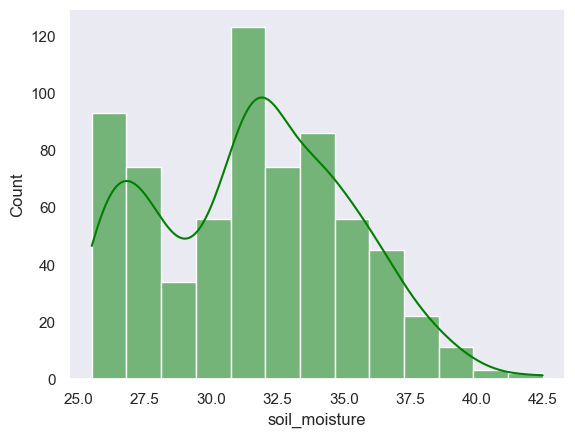

In [10]:
sns.histplot(x='soil_moisture',data=df,kde=True,color='green')

<Axes: xlabel='soil_temperature', ylabel='Count'>

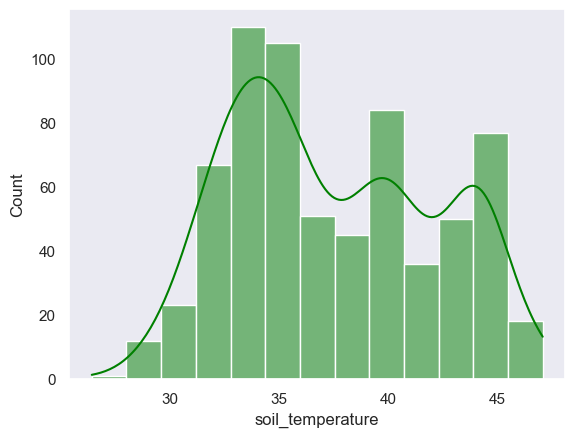

In [11]:
sns.histplot(x='soil_temperature',data=df,kde=True, color='green')

<Axes: xlabel='soil_moisture', ylabel='soil_temperature'>

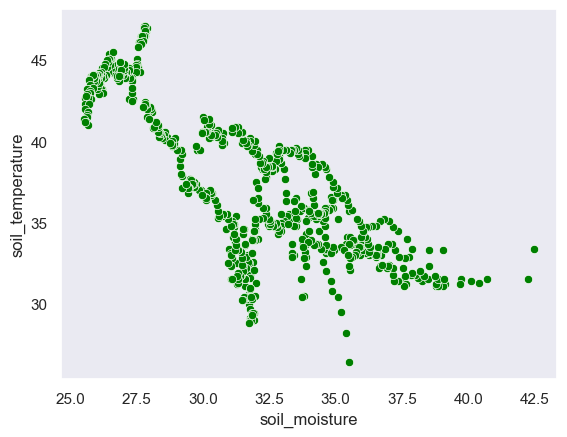

In [12]:
sns.scatterplot(x='soil_moisture',y='soil_temperature',data=df,color='green')

In [13]:
df.isna().sum()

index               0
datetime            0
soil_moisture       0
soil_temperature    0
454                 0
                   ..
934                 0
938                 0
942                 0
946                 0
950                 0
Length: 129, dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df1=df.copy()

In [17]:
# df.drop(columns=['index','datetime','year','month'],axis=1,inplace=True)

In [19]:
df.head()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,606,610,614,618,622,626,630,634,638,642,646,650,654,658,662,666,670,674,678,682,686,690,694,698,702,706,710,714,718,722,726,730,734,738,742,746,750,754,758,762,766,770,774,778,782,786,790,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
0,0,2017-05-23 14:06:17,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,0.091937,0.093224,0.094385,0.095525,0.096540,0.097314,0.098643,0.099727,0.100315,0.100970,0.102445,0.103158,0.104330,0.105502,0.106747,0.107808,0.108972,0.110062,0.111475,0.112408,0.114026,0.115428,0.116656,0.117563,0.118604,0.120297,0.121540,0.122902,0.124128,0.125389,0.126915,0.128255,0.129456,0.130560,0.131703,0.133032,0.134231,0.135413,0.136705,0.137879,0.138825,0.139682,0.140110,0.140961,0.141718,0.142165,0.143240,0.144417,0.145237,0.145595,0.145843,0.146072,0.146550,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,2017-05-23 14:08:17,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,0.090900,0.092436,0.093708,0.094447,0.095737,0.096545,0.097538,0.098355,0.099056,0.100267,0.101267,0.102085,0.103209,0.104392,0.105429,0.106537,0.107480,0.108868,0.110183,0.111710,0.113016,0.114101,0.115486,0.116505,0.117551,0.119242,0.120538,0.121648,0.122903,0.124025,0.125388,0.126950,0.128283,0.129832,0.130674,0.131354,0.132735,0.134591,0.135896,0.136682,0.137322,0.138213,0.139124,0.140073,0.140868,0.141593,0.141932,0.142277,0.143425,0.144398,0.144630,0.145129,0.145314,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,2017-05-23 14:10:17,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,0.091509,0.092728,0.093977,0.094496,0.095544,0.096208,0.097208,0.098451,0.099294,0.100364,0.100893,0.102361,0.103514,0.104140,0.105620,0.106982,0.107483,0.108906,0.110083,0.111291,0.112820,0.114293,0.115602,0.116240,0.117658,0.118681,0.119979,0.121427,0.122773,0.124476,0.125851,0.127127,0.128307,0.129619,0.130696,0.131959,0.133335,0.134636,0.135737,0.136548,0.137510,0.138427,0.139275,0.139638,0.140091,0.141033,0.141589,0.142576,0.143226,0.144020,0.144574,0.145234,0.145732,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,

In [20]:
# get hyperspectral bands:
hypbands = []
for col in df.columns:
    try:
        int(col)
    except Exception:
        continue
    hypbands.append(col)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[hypbands],df["soil_moisture"],test_size=0.5, random_state=42, shuffle=True)

for i in (X_train,X_test,y_train,y_test):
    print(i.shape)

(339, 125)
(340, 125)
(339,)
(340,)


In [22]:
lr_model=LinearRegression()

lr_model.fit(X_train, y_train)

lr_pred=lr_model.predict(X_test)

In [23]:
sc=lr_model.score(X_train,y_train)

print("\nScore:",round(sc*100))


Score: 93


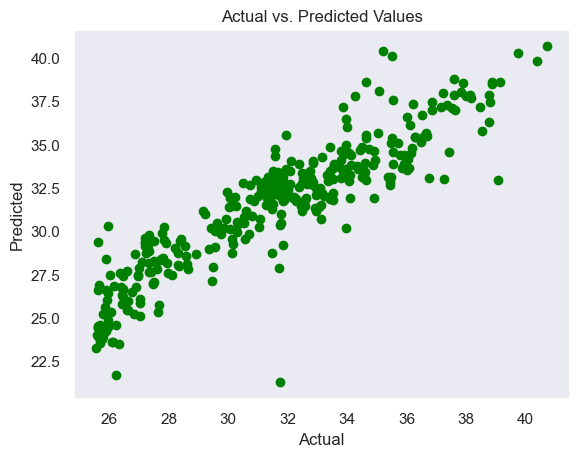

In [24]:
plt.scatter(y_test, lr_pred,color='green')

plt.xlabel('Actual')

plt.ylabel('Predicted')

plt.title('Actual vs. Predicted Values')

plt.show()

# Conclusion:

A score of 93 (if referring to a model evaluation metric like accuracy, R-squared, etc.) generally indicates a high level of performance, suggesting that the model is capturing a significant portion of the variability in the data or making accurate predictions.

For instance, if it's the R-squared score in a regression context:

- An R-squared score of 93 means that approximately 93% of the variance in the dependent variable (such as soil moisture) is predictable from the independent variables (hyperspectral bands in this case).
- This suggests that the model is explaining a large proportion of the variability in the soil moisture based on the information available in the hyperspectral bands.

In most cases, a high score like this would imply that the model is performing well. However, the interpretation of the score should consider the context of the problem, domain-specific requirements, and potential limitations:

- **Domain-specific context:** Some domains might demand higher accuracy thresholds, or certain variances might be harder to predict accurately.
- **Overfitting:** A very high score might indicate overfitting, where the model has learned the training data too well and may not generalize well to new, unseen data.
- **Model Selection:** It's beneficial to compare this score with other models or baselines to ensure that this performance is indeed exceptional for the specific problem.

In summary, while a score of 93 is impressive, it's crucial to interpret it within the context of the problem and the specific requirements of the application to ensure the model's performance meets the desired criteria.